In [2]:
#SEGMENTACION
#INSTALAR LIBRERIAS
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install scikit

^C


ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [4]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

*** (a) K= 3, Variables = “review_scores_accuracy” y “number_of_reviews”***

In [5]:
#Convertimos el dataset en dataframe
df= pd.read_csv("Tokyo_Japon.csv")
df

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_name,host_since,host_response_time,...,availability_365,calendar_last_scraped,has_availability,license,reviews_per_month,maximum_nights_avg_ntm,minimum_nights_avg_ntm,host_verifications,scrape_id,last_scraped
0,197677,https://www.airbnb.com/rooms/197677,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,Yoshimi & Marek,2011-08-13,within a day,...,147,2025-03-24,t,M130003350,1.11,1125.0,3.0,"['email', 'phone']",20250323161203,2025-03-24
1,905944,https://www.airbnb.com/rooms/905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/hosting/Hosti...,4847803,Best Stay In Tokyo!,2013-01-25,within an hour,...,267,2025-03-24,t,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,1.74,1009.6,4.8,"['email', 'phone']",20250323161203,2025-03-24
2,1016831,https://www.airbnb.com/rooms/1016831,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,Wakana,2013-03-24,within a few hours,...,50,2025-03-24,t,M130001107,1.89,7.0,2.0,"['email', 'phone']",20250323161203,2025-03-24
3,1196177,https://www.airbnb.com/rooms/1196177,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,Yukiko,2013-03-30,within an hour,...,54,2025-03-24,t,M130007760,0.99,1125.0,2.0,"['email', 'phone']",20250323161203,2025-03-24
4,1249571,https://www.airbnb.com/rooms/1249571,Unique stay! New&1min to the subway,NaN,NaN,https://a0.muscache.com/pictures/d37dbd4c-dcb6...,6809418,Yume,2013-06-09,within a day,...,90,2025-03-24,t,M130000957,1.02,365.0,8.0,"['email', 'phone']",20250323161203,2025-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22778,1380096861872988432,https://www.airbnb.com/rooms/1380096861872988432,[Monthly][June 2-July 4]Otsuka sta 5min/w(3-703),"Built in 2018, a cozy and high quality apartme...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,197405131,春樹,2018-06-22,within an hour,...,110,2025-03-24,t,M130006450,NaN,90.0,30.0,"['email', 'phone']",20250323161203,2025-03-24
22779,1380108173469178648,https://www.airbnb.com/rooms/1380108173469178648,E-8 mins walk from Waseda Sta/Up to 4p/Wi-fi,-RECO Waseda-<br />☆OPEN March 2025☆<br /><br ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,576585843,阿部,2024-05-08,within an hour,...,340,2025-03-24,t,M130049005,NaN,365.0,1.0,"['email', 'phone']",20250323161203,2025-03-24
22780,1380110224877197644,https://www.airbnb.com/rooms/1380110224877197644,F-8 mins walk from Waseda Sta/Up to 4p/Wi-fi,-RECO Waseda-<br />☆OPEN March 2025☆<br /><br ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,576585843,阿部,2024-05-08,within an hour,...,348,2025-03-24,t,M130049006,NaN,365.0,1.0,"['email', 'phone']",20250323161203,2025-03-24
22781,1380112481290252606,https://www.airbnb.com/rooms/1380112481290252606,G-8 mins walk from Waseda Sta/Up to 4p/Wi-fi,-RECO Waseda-<br />☆OPEN March 2025☆<br /><br ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,576585843,阿部,2024-05-08,within an hour,...,354,2025-03-24,t,M130049007,NaN,365.0,1.0,"['email', 'phone']",20250323161203,2025-03-24


In [6]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22783 entries, 0 to 22782
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22783 non-null  int64  
 1   listing_url                     22783 non-null  object 
 2   name                            22783 non-null  object 
 3   description                     22422 non-null  object 
 4   neighborhood_overview           13142 non-null  object 
 5   picture_url                     22783 non-null  object 
 6   host_id                         22783 non-null  int64  
 7   host_name                       22783 non-null  object 
 8   host_since                      22783 non-null  object 
 9   host_response_time              22262 non-null  object 
 10  host_response_rate              22262 non-null  object 
 11  host_is_superhost               21343 non-null  object 
 12  host_listings_count             

In [7]:
df =df.fillna (method='ffill')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2996\4001115741.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna (method='ffill')


In [8]:
xb = df[['review_scores_accuracy','number_of_reviews']].values

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [10]:
etiquetas = kmeans.fit_predict(xb)
etiquetas

array([0, 2, 2, ..., 1, 1, 1], dtype=int32)

In [11]:
centroides = kmeans.cluster_centers_
centroides

array([[  4.79315996, 117.20774116],
       [  4.74499713,  16.72595224],
       [  4.81474777, 371.83679525]])

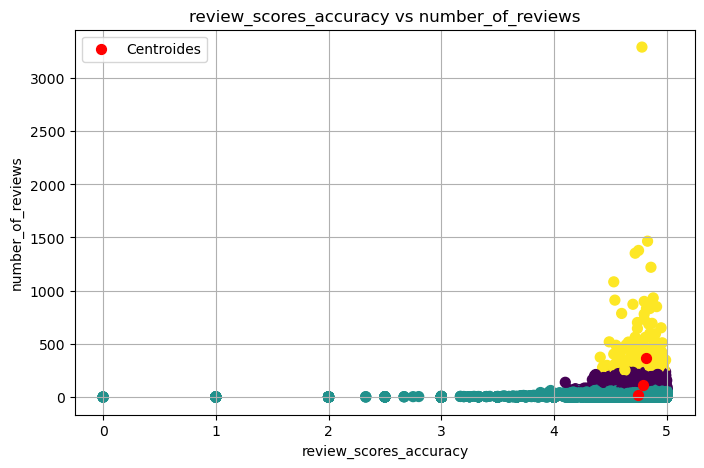

In [12]:
    # Para visualizar en 1D, puedes usar el índice como eje X
plt.figure(figsize=(8, 5))
plt.scatter(xb[:, 0], xb[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter([centroides[:, 0]], centroides[:, 1],c ='red', marker='.', s=200, label='Centroides')

plt.title("review_scores_accuracy vs number_of_reviews")
plt.xlabel("review_scores_accuracy")
plt.ylabel("number_of_reviews")
plt.legend()
plt.grid(True)
plt.show()

*** (b) K= 2, Variables = “host_listings_count”, “accommodates”, “beds” y “price” ***

In [13]:
X = df[["host_listings_count", "accommodates", "beds", "price"]].values
X

array([[1, 2, 2.0, '$10,400.00'],
       [9, 6, 4.0, '$27,735.00'],
       [1, 2, 2.0, '$25,143.00'],
       ...,
       [107, 4, 2.0, '$19,286.00'],
       [107, 4, 2.0, '$24,429.00'],
       [4, 16, 9.0, '$151,429.00']], dtype=object)

In [14]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: '$10,400.00'

In [15]:
df['price'] = df['price'].astype(float)

ValueError: could not convert string to float: '$10,400.00'

In [16]:
df['price'] = df['price'].str.replace('¥', '')
df['price'] = df['price'].str.replace(',', '')



In [17]:
xx = df[['host_listings_count','accommodates','beds','price']].copy()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(xb)

KMeans(n_clusters=3, random_state=42)

In [19]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(xb)
etiquetas

array([0, 2, 2, ..., 1, 1, 1], dtype=int32)

In [20]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[  4.79315996, 117.20774116],
       [  4.74499713,  16.72595224],
       [  4.81474777, 371.83679525]])

In [21]:
df.insert(loc=8, column='cluster_4D', value=etiquetas)

# Verificamos
df.head()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_name,cluster_4D,host_since,...,availability_365,calendar_last_scraped,has_availability,license,reviews_per_month,maximum_nights_avg_ntm,minimum_nights_avg_ntm,host_verifications,scrape_id,last_scraped
0,197677,https://www.airbnb.com/rooms/197677,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,Yoshimi & Marek,0,2011-08-13,...,147,2025-03-24,t,M130003350,1.11,1125.0,3.0,"['email', 'phone']",20250323161203,2025-03-24
1,905944,https://www.airbnb.com/rooms/905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/hosting/Hosti...,4847803,Best Stay In Tokyo!,2,2013-01-25,...,267,2025-03-24,t,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,1.74,1009.6,4.8,"['email', 'phone']",20250323161203,2025-03-24
2,1016831,https://www.airbnb.com/rooms/1016831,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,Wakana,2,2013-03-24,...,50,2025-03-24,t,M130001107,1.89,7.0,2.0,"['email', 'phone']",20250323161203,2025-03-24
3,1196177,https://www.airbnb.com/rooms/1196177,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,Yukiko,0,2013-03-30,...,54,2025-03-24,t,M130007760,0.99,1125.0,2.0,"['email', 'phone']",20250323161203,2025-03-24
4,1249571,https://www.airbnb.com/rooms/1249571,Unique stay! New&1min to the subway,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/d37dbd4c-dcb6...,6809418,Yume,0,2013-06-09,...,90,2025-03-24,t,M130000957,1.02,365.0,8.0,"['email', 'phone']",20250323161203,2025-03-24


In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(xb)
centroides_pca=pca.fit_transform(centroides)
pca


PCA(n_components=2)

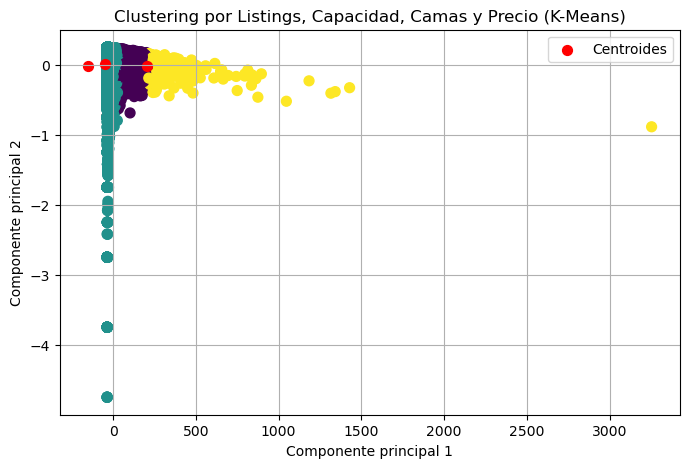

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
            c='red', marker='.', s=200, label='Centroides')
plt.title("Clustering por Listings, Capacidad, Camas y Precio (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()


*** (c) K= 5, Variables = “price”, “review_scores_value”, “review_scores_location” y “price” ***

In [24]:
X = df[["price", "review_scores_value", "review_scores_location", "price"]].values
X

array([['$10400.00', 4.8, 4.56, '$10400.00'],
       ['$27735.00', 4.8, 4.8, '$27735.00'],
       ['$25143.00', 4.9, 4.92, '$25143.00'],
       ...,
       ['$19286.00', 5.0, 5.0, '$19286.00'],
       ['$24429.00', 5.0, 5.0, '$24429.00'],
       ['$151429.00', 5.0, 5.0, '$151429.00']], dtype=object)

In [25]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(xb)

In [26]:
df['price'] = df['price'].astype(float)

ValueError: could not convert string to float: '$10400.00'

In [ ]:
df['price'] = df['price'].str.replace('¥', '')
df['price'] = df['price'].str.replace(',', '')


In [ ]:
x3 = df[[ "price", "review_scores_value", "review_scores_location", "price"]].copy()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(xb)

KMeans(n_clusters=5, random_state=42)

In [ ]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(xb)
etiquetas

array([4, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[   4.77616   ,   63.06378947],
       [   4.74030574,   10.86722554],
       [   4.81871257,  320.93113772],
       [   4.77954545, 1032.18181818],
       [   4.80378955,  156.31499312]])

In [ ]:
df.insert(loc=8, column='cluster_4D', value=etiquetas)

# Verificamos
df.head()

NameError: name 'df' is not defined